## Data Cleaning (keeping only images with faces and more than 1 eyes)

In [41]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

### Importing Image

In [42]:
img = cv2.imread(r"D:\VS Code\marvel_celebrity_image_classification\model\test_images\18.jpg")
img.shape

(1677, 1677, 3)

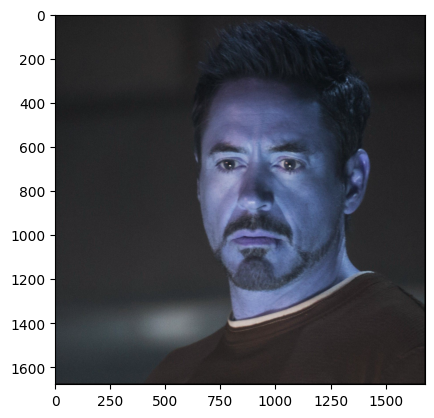

In [43]:
plt.imshow(img)

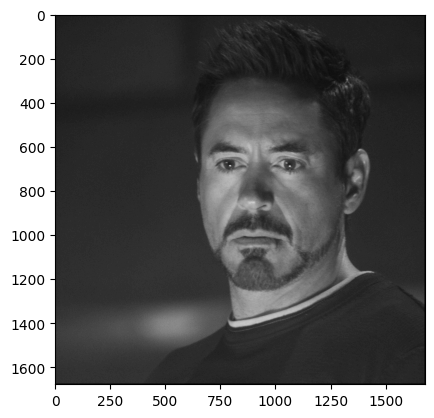

In [44]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

### Detecting Position of Face in Images

In [45]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('D:\\VS Code\\marvel_celebrity_image_classification\\model\\opencv\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

#Returned Values of faces (x,y,width & height) from where face starts forming a rectangle

array([[498, 317, 852, 852]], dtype=int32)

In [46]:
(x,y,w,h) = faces[0]
print(x,y,w,h)

498 317 852 852


### Plotting Red Rectangle around face in Image

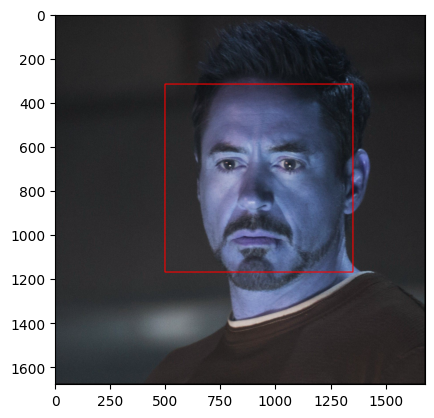

In [47]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_img)

cropped_img = img[y:y+h, x:x+w]
#plt.imshow(cropped_img)

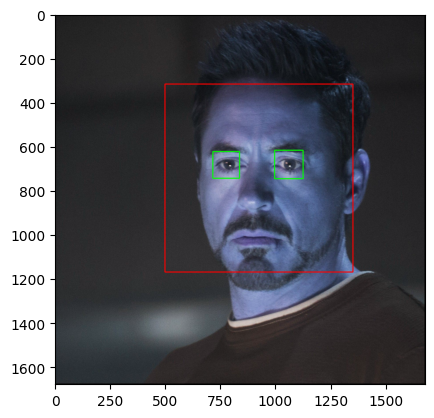

In [48]:
eyes = eye_cascade.detectMultiScale(gray,1.3,5)
for (ex,ey,ew,eh) in eyes:
    eye_img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
    
plt.imshow(eye_img, cmap='gray')
#plt.imshow(cropped_img, cmap='gray')

### Funtion to return cropped Image

In [49]:
def crop_img(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # Check if one or more faces are detected
    if len(faces) >= 1:
        x, y, w, h = faces[0]
        cropped_gray_face = gray[y:y+h, x:x+w]
        cropped_color_face = img[y:y+h, x:x+w]
        # Detect eyes within the cropped face
        eyes = eye_cascade.detectMultiScale(cropped_gray_face)
        # Check if exactly two eyes are detected
        if len(eyes) >= 2:
            return cropped_color_face      
       
#for (ex,ey,ew,eh) in eyes:
    #    eye_img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)

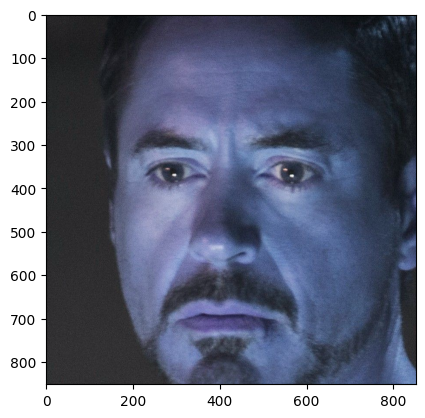

In [50]:
cropped_img = crop_img(r"D:\VS Code\marvel_celebrity_image_classification\model\test_images\18.jpg")    
plt.imshow(cropped_img, cmap='gray')
#print(cropped_img)

### Creating directories and storing path of all datasets

In [51]:
# Storing paths in variables
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/cropped/"

In [52]:
#Storing path of individual persons images
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./Dataset/Captain_America',
 './Dataset/Spider_Man-Toby_Maguire',
 './Dataset/Thor',
 './Dataset/Tony_Stark',
 './Dataset/Wolverine']

In [53]:
# If cropped folder exists remove it and create new folder, else create new folder

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

### Storing cropped Images in Directories

In [57]:
#Celebrity name using directories
#Storing cropped Images into new directories
cropped_img_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        cropped_color_face = crop_img(entry.path)
        if cropped_color_face is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating Cropped Images in folder:", cropped_folder)
            
            #Storing cropped images in its respective folder
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, cropped_color_face)
            #Storing name of all image file paths in dictionary
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1


#After doing few Manual Cleaning Data Cleaning is Done

Captain_America
Spider_Man-Toby_Maguire
Thor
Tony_Stark
Wolverine
